# YOGA POSE ESTIMATION MINI PROJECT

In [30]:
yogatrain='C:/Users/KIIT/Documents/DATASET/TRAIN'
yogatest='C:/Users/KIIT/Documents/DATASET/TEST'

In [31]:
import os
import matplotlib.pyplot as plt


# DATA ANALYSIS

In [32]:
import pandas as pd
import seaborn as sns

Training Data Summary:
       Pose  Image Count  Percentage
0   downdog          223   20.629047
1   goddess          180   16.651249
2     plank          266   24.606846
3      tree          160   14.801110
4  warrior2          252   23.311748
Total Training Images: 1081

Testing Data Summary:
       Pose  Image Count  Percentage
0   downdog           97   20.638298
1   goddess           80   17.021277
2     plank          115   24.468085
3      tree           69   14.680851
4  warrior2          109   23.191489
Total Testing Images: 470



C:\Users\KIIT\AppData\Local\Temp\ipykernel_16144\2510741508.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pose', y='Image Count', data=train_df, palette='viridis')


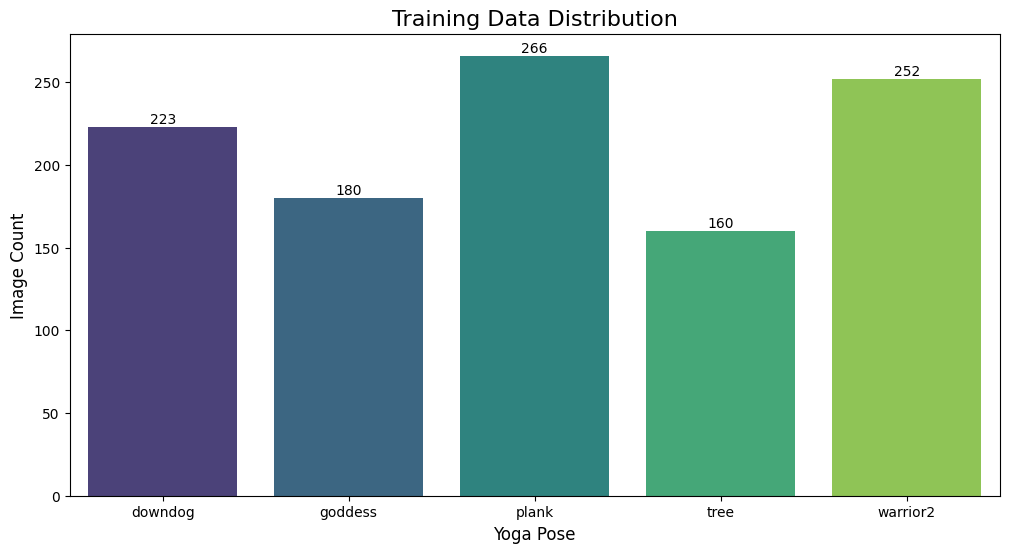

C:\Users\KIIT\AppData\Local\Temp\ipykernel_16144\2510741508.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pose', y='Image Count', data=test_df, palette='plasma')


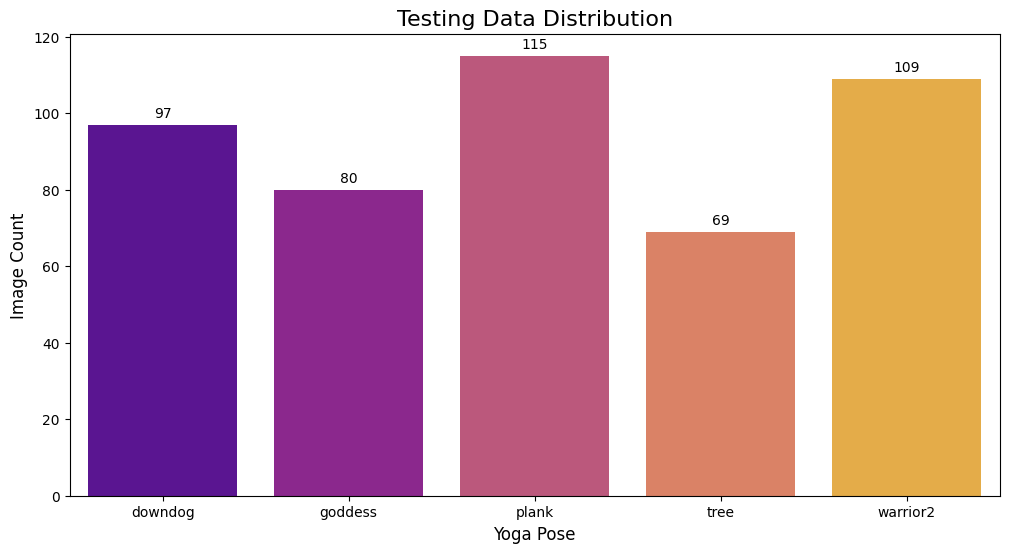

In [33]:
def count_images(data_path):
    class_counts = {}
    for folder in os.listdir(data_path):
        folder_path = os.path.join(data_path, folder)
        if os.path.isdir(folder_path):
            class_counts[folder] = len(os.listdir(folder_path))
    return class_counts

# Count images in TRAIN and TEST
train_counts = count_images(yogatrain)
test_counts = count_images(yogatest)

# Total images
total_train = sum(train_counts.values())
total_test = sum(test_counts.values())

# DataFrame for easy analysis
train_df = pd.DataFrame(list(train_counts.items()), columns=['Pose', 'Image Count'])
test_df = pd.DataFrame(list(test_counts.items()), columns=['Pose', 'Image Count'])

# Add percentages
train_df['Percentage'] = (train_df['Image Count'] / total_train) * 100
test_df['Percentage'] = (test_df['Image Count'] / total_test) * 100

# Print Summary
print("Training Data Summary:")
print(train_df)
print(f"Total Training Images: {total_train}\n")

print("Testing Data Summary:")
print(test_df)
print(f"Total Testing Images: {total_test}\n")

# Visualization: Training Data
plt.figure(figsize=(12, 6))
sns.barplot(x='Pose', y='Image Count', data=train_df, palette='viridis')
plt.title('Training Data Distribution', fontsize=16)
plt.xlabel('Yoga Pose', fontsize=12)
plt.ylabel('Image Count', fontsize=12)
for index, value in enumerate(train_df['Image Count']):
    plt.text(index, value + 2, f'{value}', ha='center', fontsize=10)
plt.show()

# Visualization: Testing Data
plt.figure(figsize=(12, 6))
sns.barplot(x='Pose', y='Image Count', data=test_df, palette='plasma')
plt.title('Testing Data Distribution', fontsize=16)
plt.xlabel('Yoga Pose', fontsize=12)
plt.ylabel('Image Count', fontsize=12)
for index, value in enumerate(test_df['Image Count']):
    plt.text(index, value + 2, f'{value}', ha='center', fontsize=10)
plt.show()

       Pose  Proportion_Train  Proportion_Test
0   downdog         20.629047        20.638298
1   goddess         16.651249        17.021277
2     plank         24.606846        24.468085
3      tree         14.801110        14.680851
4  warrior2         23.311748        23.191489


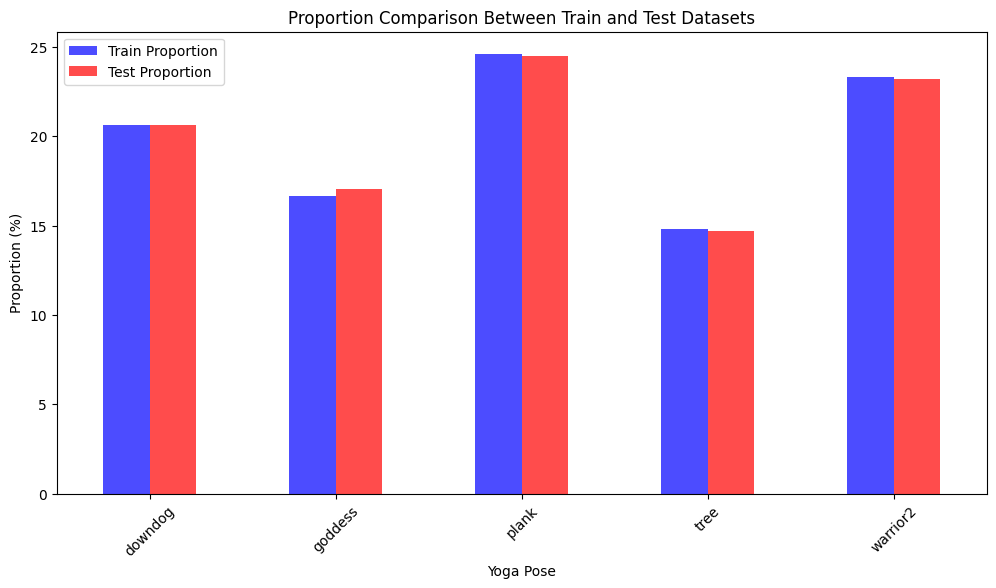

In [34]:
# Calculate Proportions of each class in Train and Test datasets
train_df['Proportion_Train'] = (train_df['Image Count'] / total_train) * 100
test_df['Proportion_Test'] = (test_df['Image Count'] / total_test) * 100

# Merge train and test dataframes for easier comparison
comparison_df = pd.merge(train_df[['Pose', 'Proportion_Train']], 
                         test_df[['Pose', 'Proportion_Test']], 
                         on='Pose', 
                         suffixes=('_Train', '_Test'))

# Display comparison
print(comparison_df)

# Visualization: Comparison of Proportions in Train and Test datasets
comparison_df.set_index('Pose')[['Proportion_Train', 'Proportion_Test']].plot(kind='bar', figsize=(12, 6), color=['blue', 'red'], alpha=0.7)
plt.title('Proportion Comparison Between Train and Test Datasets')
plt.ylabel('Proportion (%)')
plt.xlabel('Yoga Pose')
plt.xticks(rotation=45)
plt.legend(['Train Proportion', 'Test Proportion'])
plt.show()


In [35]:
print("Training Data Stats:")
print(train_df['Image Count'].describe())
print("\nTesting Data Stats:")
print(test_df['Image Count'].describe())
#Count: Number of poses.
#Mean: Average number of images per pose.
#Std: Standard deviation of the number of images across poses.
#Min/Max: Minimum and maximum number of images in any pose.
#25%, 50%, 75% Percentiles: Distribution of the image counts.

Training Data Stats:
count      5.00000
mean     216.20000
std       45.48846
min      160.00000
25%      180.00000
50%      223.00000
75%      252.00000
max      266.00000
Name: Image Count, dtype: float64

Testing Data Stats:
count      5.00000
mean      94.00000
std       19.33908
min       69.00000
25%       80.00000
50%       97.00000
75%      109.00000
max      115.00000
Name: Image Count, dtype: float64


# IMAGE ANALYSIS

In [36]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

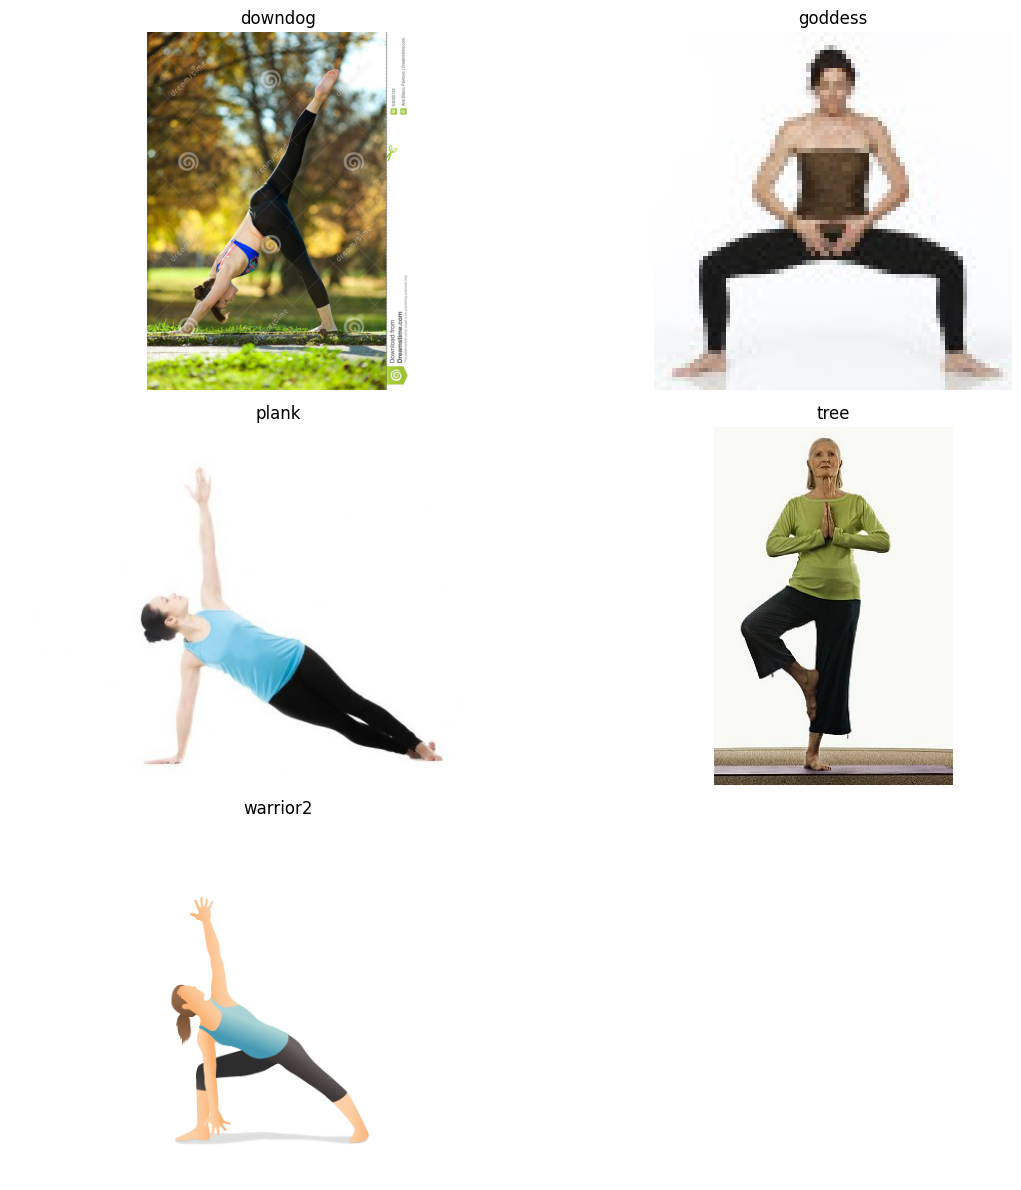

In [37]:
def visualize_samples(data_path):
    poses = os.listdir(data_path)
    plt.figure(figsize=(12, 12))
    
    for i, pose in enumerate(poses):
        pose_path = os.path.join(data_path, pose)
        if os.path.isdir(pose_path):
            # Get a random sample image from each pose folder
            sample_image = random.choice(os.listdir(pose_path))
            sample_image_path = os.path.join(pose_path, sample_image)
            
            # Plot the image
            img = mpimg.imread(sample_image_path)
            plt.subplot(3, 2, i+1)
            plt.imshow(img)
            plt.title(pose)
            plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Visualize random images from the training dataset
visualize_samples(yogatrain)

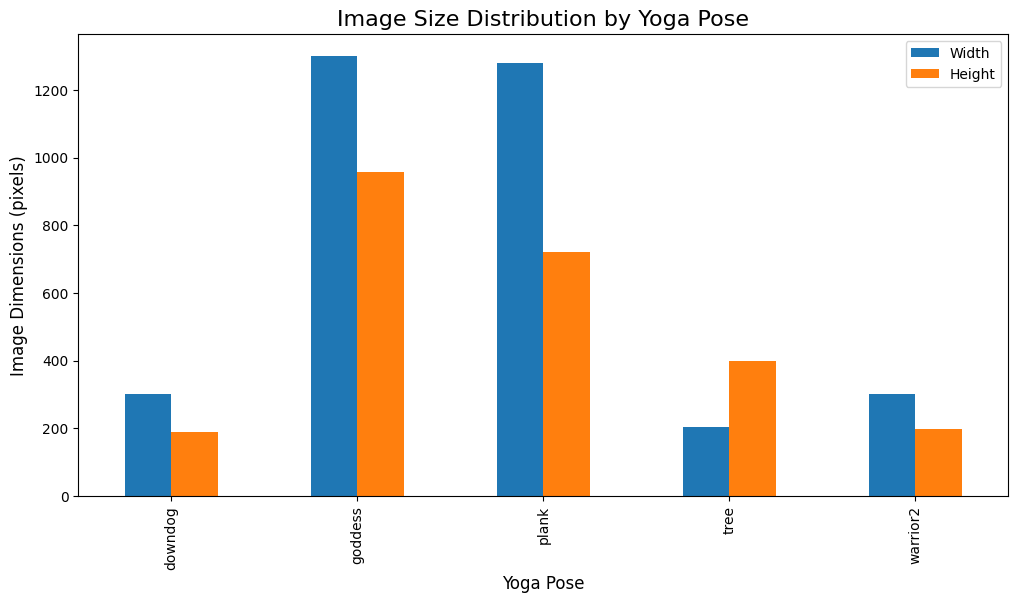

In [38]:
import cv2
#to check if they have the same size or we have to resize them 
# Function to check the size of random images from each pose class
def check_image_size(data_path):
    poses = os.listdir(data_path)
    sizes = {'Pose': [], 'Width': [], 'Height': []}
    
    for pose in poses:
        pose_path = os.path.join(data_path, pose)
        if os.path.isdir(pose_path):
            sample_image = random.choice(os.listdir(pose_path))
            sample_image_path = os.path.join(pose_path, sample_image)
            
            # Read image
            img = cv2.imread(sample_image_path)
            height, width, _ = img.shape
            
            # Save the width and height of the image
            sizes['Pose'].append(pose)
            sizes['Width'].append(width)
            sizes['Height'].append(height)
    
    size_df = pd.DataFrame(sizes)
    
    # Plot image size distribution
    size_df.set_index('Pose').plot(kind='bar', figsize=(12, 6))
    plt.title('Image Size Distribution by Yoga Pose', fontsize=16)
    plt.xlabel('Yoga Pose', fontsize=12)
    plt.ylabel('Image Dimensions (pixels)', fontsize=12)
    plt.show()

# Check and visualize the image sizes for the training dataset
check_image_size(yogatrain)


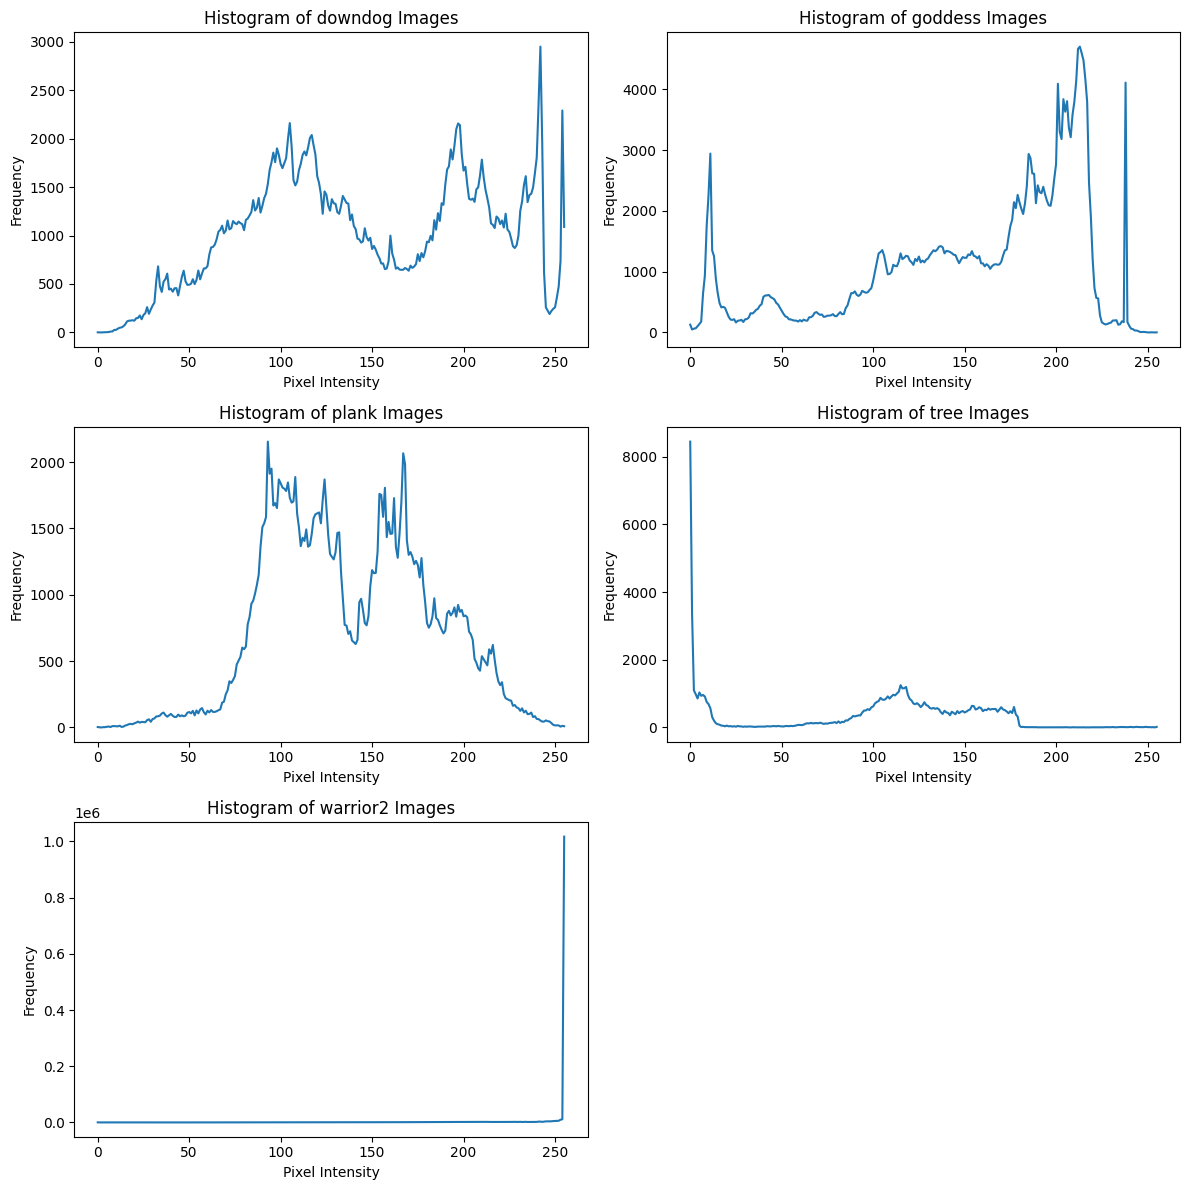

In [39]:
import cv2
import numpy as np

# Function to calculate and display the histogram for each pose class
def plot_histograms(data_path):
    poses = os.listdir(data_path)
    plt.figure(figsize=(12, 12))
    
    for i, pose in enumerate(poses):
        pose_path = os.path.join(data_path, pose)
        if os.path.isdir(pose_path):
            # Get random sample from each pose folder
            sample_image = random.choice(os.listdir(pose_path))
            sample_image_path = os.path.join(pose_path, sample_image)
            
            # Read image
            img = cv2.imread(sample_image_path, cv2.IMREAD_GRAYSCALE)
            hist = cv2.calcHist([img], [0], None, [256], [0, 256])
            
            # Plot histogram
            plt.subplot(3, 2, i+1)
            plt.plot(hist)
            plt.title(f'Histogram of {pose} Images')
            plt.xlabel('Pixel Intensity')
            plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

# Plot histograms for the training dataset
plot_histograms(yogatrain)


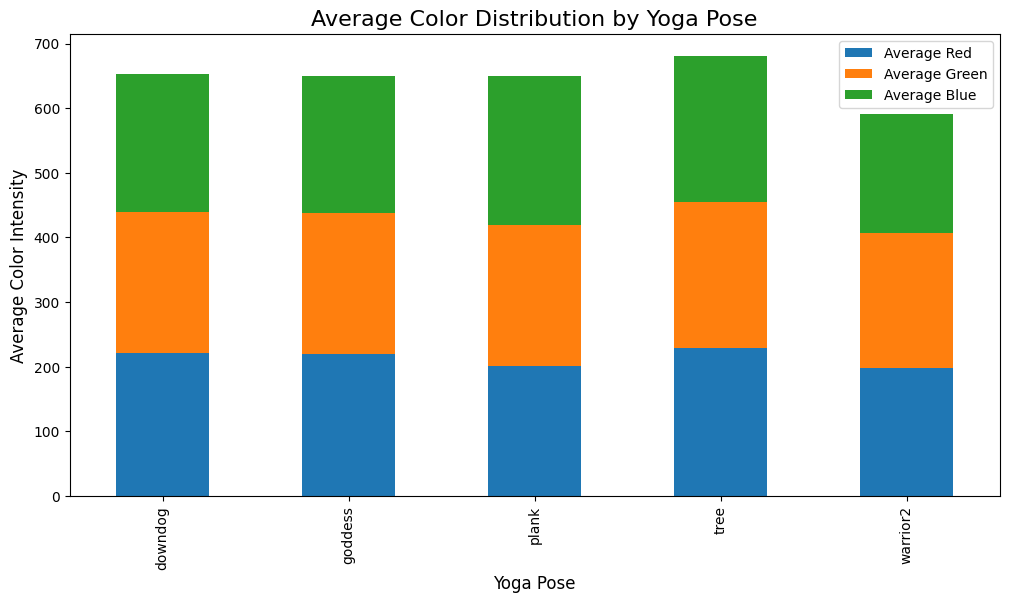

In [40]:
import cv2
import numpy as np

# Function to calculate and plot the average color for each pose class
def average_color(data_path):
    poses = os.listdir(data_path)
    colors = {'Pose': [], 'Average Red': [], 'Average Green': [], 'Average Blue': []}
    
    for pose in poses:
        pose_path = os.path.join(data_path, pose)
        if os.path.isdir(pose_path):
            sample_image = random.choice(os.listdir(pose_path))
            sample_image_path = os.path.join(pose_path, sample_image)
            
            # Read image
            img = cv2.imread(sample_image_path)
            avg_color_per_row = np.average(img, axis=0)
            avg_color = np.average(avg_color_per_row, axis=0)
            
            # Append the average color
            colors['Pose'].append(pose)
            colors['Average Red'].append(avg_color[2])
            colors['Average Green'].append(avg_color[1])
            colors['Average Blue'].append(avg_color[0])
    
    color_df = pd.DataFrame(colors)
    
    # Plot average color distribution
    color_df.set_index('Pose').plot(kind='bar', stacked=True, figsize=(12, 6))
    plt.title('Average Color Distribution by Yoga Pose', fontsize=16)
    plt.xlabel('Yoga Pose', fontsize=12)
    plt.ylabel('Average Color Intensity', fontsize=12)
    plt.show()

# Plot the average color distribution for the training dataset
average_color(yogatrain)
